<a href="https://colab.research.google.com/github/HannaJacob/Projeto-Grupo-M5/blob/main/MDL5_CriptoMoedas_Grupo2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de Bibliotecase preparação dos dados
Vamos começar importando as bibliotecas necessárias, além de ajustar a base de dados para responder as perguntas por conseguinte.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from google.colab import files
from io import StringIO

In [3]:
# Função para limpeza e preparação dos DataFrames
def limpar_e_preparar_dataframe(dataframe):
    # Substituir diferentes formatos de dados faltantes por "NaN"
    dataframe = dataframe.replace(["", "null", "NaN"], float("NaN"))

    # Verificar dados ausentes
    print(f"\nDados ausentes no DataFrame:\n{dataframe.isnull().sum()}")

    # Apreciar os 10 primeiros caracteres da coluna "Date"
    dataframe['Date'] = dataframe['Date'].str[:10]

    # Transformar a coluna "Date" para o formato datetime
    dataframe['Date'] = pd.to_datetime(dataframe['Date'], errors='coerce')

    # Converter colunas numéricas para o formato adequado
    colunas_numericas = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']
    dataframe[colunas_numericas] = dataframe[colunas_numericas].apply(pd.to_numeric, errors='coerce')

    # Imputação por regressão linear
    for coluna in dataframe.columns:
        if dataframe[coluna].isnull().any():
            # Dividir os dados em conhecidos e desconhecidos
            conhecidos = dataframe.dropna(subset=[coluna])
            desconhecidos = dataframe[dataframe[coluna].isnull()]

            # Treinar um modelo de regressão linear
            modelo = LinearRegression()
            modelo.fit(conhecidos.drop(coluna, axis=1), conhecidos[coluna])

            # Prever os valores desconhecidos
            valores_previstos = modelo.predict(desconhecidos.drop(coluna, axis=1))

            # Substituir os valores faltantes pelos valores previstos
            dataframe.loc[dataframe[coluna].isnull(), coluna] = valores_previstos

    # Verificar novamente dados ausentes após a imputação
    print(f"\nDados ausentes após imputação por regressão linear:\n{dataframe.isnull().sum()}")

    # Ordenar o DataFrame pela coluna de data
    dataframe = dataframe.sort_values(by='Date')

    return dataframe

In [4]:
# Lista com os prefixos dos arquivos
prefixos_arquivos = ["Bitcoin", "Cardano", "ChainLink", "Cosmos", "Dogecoin",
                     "Ethereum", "Solana", "Stellar", "Tether", "Tron"]

# Dicionário para armazenar os DataFrames
dataframes = {}

# Loop para importar, limpar e adicionar os DataFrames
for prefixo in prefixos_arquivos:
    print(f"Faça o upload do arquivo {prefixo}.csv")
    uploaded_file = files.upload()

    # Criar DataFrame
    nome_dataframe = "df" + prefixo
    dataframe = pd.read_csv(list(uploaded_file.keys())[0], sep=',')

    # Limpeza e preparação dos dados
    dataframe = limpar_e_preparar_dataframe(dataframe)

    # Adicionar ao dicionário
    dataframes[nome_dataframe] = dataframe

# Listar os nomes dos DataFrames criados
dataframe_names = list(dataframes.keys())
dataframe_names

Faça o upload do arquivo Bitcoin.csv


Saving coin_Bitcoin.csv to coin_Bitcoin.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Faça o upload do arquivo Cardano.csv


Saving coin_Cardano.csv to coin_Cardano.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Faça o upload do arquivo ChainLink.csv


Saving coin_ChainLink.csv to coin_ChainLink.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Faça o upload do arquivo Cosmos.csv


Saving coin_Cosmos.csv to coin_Cosmos.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Faça o upload do arquivo Dogecoin.csv


Saving coin_Dogecoin.csv to coin_Dogecoin.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Faça o upload do arquivo Ethereum.csv


Saving coin_Ethereum.csv to coin_Ethereum.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Faça o upload do arquivo Solana.csv


Saving coin_Solana.csv to coin_Solana.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Faça o upload do arquivo Stellar.csv


Saving coin_Stellar.csv to coin_Stellar.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Faça o upload do arquivo Tether.csv


Saving coin_Tether.csv to coin_Tether.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64
Faça o upload do arquivo Tron.csv


Saving coin_Tron.csv to coin_Tron.csv

Dados ausentes no DataFrame:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Dados ausentes após imputação por regressão linear:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


['dfBitcoin',
 'dfCardano',
 'dfChainLink',
 'dfCosmos',
 'dfDogecoin',
 'dfEthereum',
 'dfSolana',
 'dfStellar',
 'dfTether',
 'dfTron']

In [5]:
dataframes['dfBitcoin']

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09
...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11
2987,2988,Bitcoin,BTC,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11
2988,2989,Bitcoin,BTC,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11
2989,2990,Bitcoin,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11


# 1: Qual foi o comportamento dos valores para todas as criptomoedas? Houve uma tendência de alta ou baixa?

### Abordagem de Visualização
1. **Gráfico Inicial (Todas as Criptomoedas):**
   - Objetivo: Obter uma visão panorâmica das movimentações diárias, incluindo Bitcoin e Ethereum.
   - Justificativa: Proporciona uma análise abrangente da evolução do mercado de criptomoedas.

2. **Gráfico Sem Bitcoin:**
   - Objetivo: Analisar as diferenças entre as criptomoedas excluindo a presença do Bitcoin.
   - Justificativa: Ao remover o Bitcoin, que frequentemente apresenta valores substancialmente mais elevados, conseguimos uma escala mais equitativa para observar as variações.

3. **Gráfico Sem Bitcoin e Ethereum:**
   - Objetivo: Focar nas diferenças entre as altcoins, excluindo tanto Bitcoin quanto Ethereum.
   - Justificativa: A exclusão do Ethereum, outro ativo de grande relevância, permite uma análise mais detalhada das criptomoedas menos proeminentes.

### Escolha do Período de Visualização a Partir de 2017
- Decidimos iniciar a análise a partir de janeiro de 2017. Antes desse ponto, os valores apresentavam relativa homogeneidade, dificultando a identificação de padrões.
- O início de 2017 marca um período de crescimento notável no mercado de criptomoedas, justificando a escolha desse ponto como marco inicial.

### Conclusão da Análise
Essa abordagem sequencial permitiu ajustar o nível de detalhamento conforme necessário, adaptando a visualização para diferentes propósitos analíticos. Cada gráfico atendeu a um objetivo específico, proporcionando uma compreensão mais profunda das movimentações nos valores de fechamento ao longo do tempo. A análise focalizada em diferentes grupos de criptomoedas possibilitou a identificação de padrões, tendências e diferenças marcantes, contribuindo para uma compreensão abrangente do mercado.

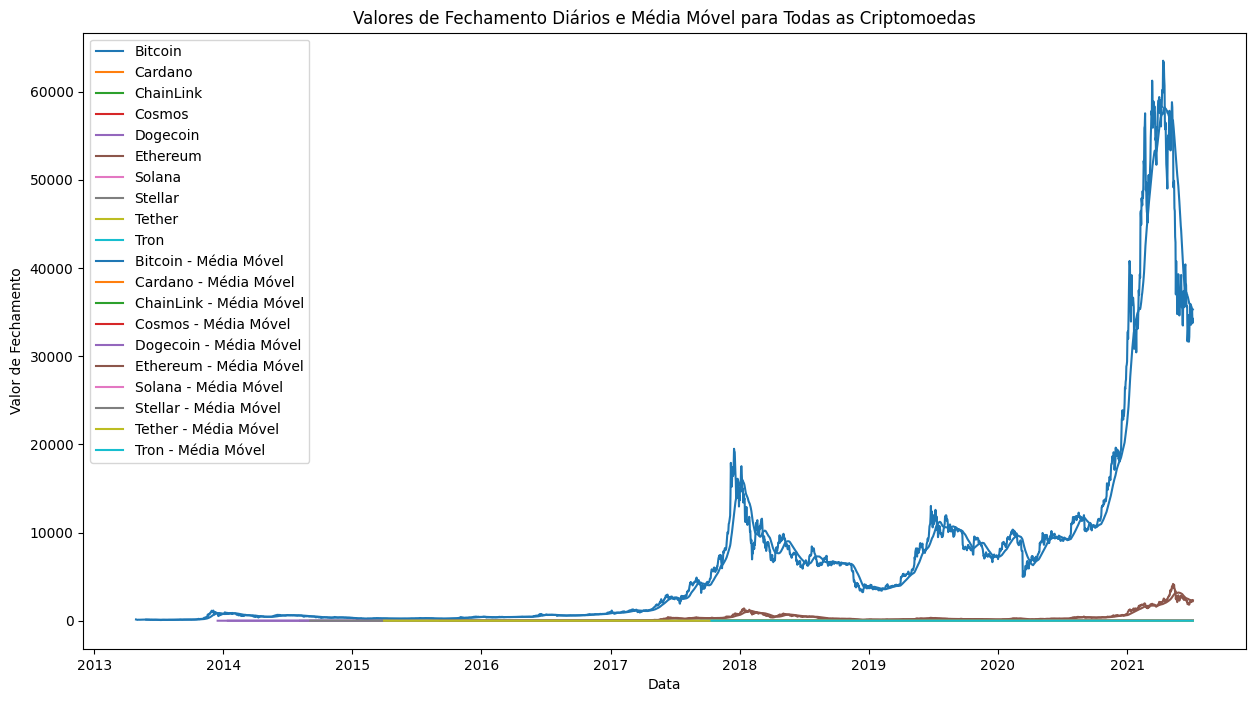

In [6]:
# Configurações para melhor visualização do gráfico
plt.figure(figsize=(15, 8))
plt.title('Valores de Fechamento Diários e Média Móvel para Todas as Criptomoedas')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento')

# Plotar os valores de fechamento para cada criptomoeda
for nome_dataframe, dataframe in dataframes.items():
    if nome_dataframe.startswith('df'):
        plt.plot(dataframe['Date'], dataframe['Close'], label=nome_dataframe[2:])

# Calcular e plotar a média móvel para suavizar a tendência
for nome_dataframe, dataframe in dataframes.items():
    if nome_dataframe.startswith('df'):
        media_movel = dataframe['Close'].rolling(window=30).mean()  # Média móvel com janela de 30 dias
        plt.plot(dataframe['Date'], media_movel, label=f'{nome_dataframe[2:]} - Média Móvel')

# Adicionar legenda e mostrar o gráfico
plt.legend()
plt.show()

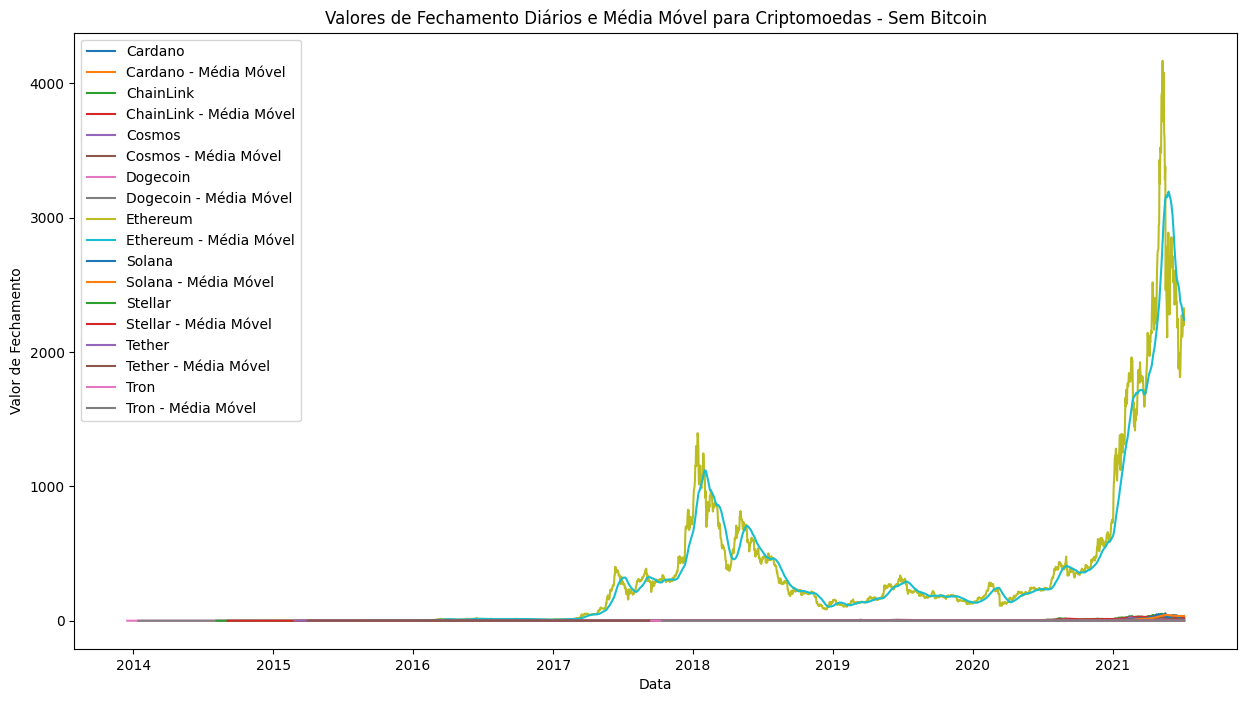

In [13]:
# Configurações para melhor visualização do gráfico
plt.figure(figsize=(15, 8))
plt.title('Valores de Fechamento Diários e Média Móvel para Criptomoedas - Sem Bitcoin')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento')

# Plotar os valores de fechamento para cada criptomoeda (exceto Bitcoin)
for nome_dataframe, dataframe in dataframes.items():
    if nome_dataframe.startswith('df') and not nome_dataframe.endswith('Bitcoin'):
        plt.plot(dataframe['Date'], dataframe['Close'], label=nome_dataframe[2:])

        # Calcular e plotar a média móvel para suavizar a tendência
        media_movel = dataframe['Close'].rolling(window=30).mean()  # Média móvel com janela de 30 dias
        plt.plot(dataframe['Date'], media_movel, label=f'{nome_dataframe[2:]} - Média Móvel')

# Adicionar legenda e mostrar o gráfico
plt.legend()
plt.show()

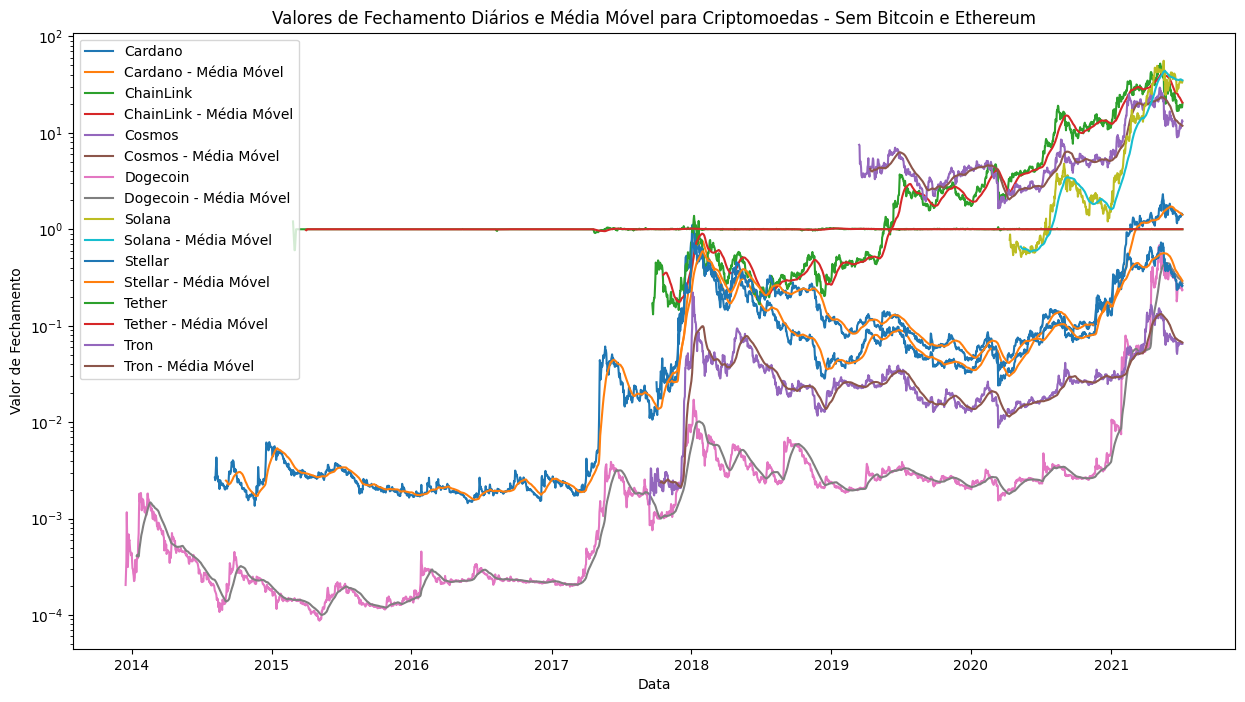

In [14]:
# Configurações para melhor visualização do gráfico
plt.figure(figsize=(15, 8))
plt.title('Valores de Fechamento Diários e Média Móvel para Criptomoedas - Sem Bitcoin e Ethereum')
plt.xlabel('Data')
plt.ylabel('Valor de Fechamento')

# Excluir Bitcoin e Ethereum
dataframes_filtered = {nome: df for nome, df in dataframes.items() if not nome.endswith(('Bitcoin', 'Ethereum'))}

# Plotar os valores de fechamento para cada criptomoeda (exceto Bitcoin e Ethereum)
for nome_dataframe, dataframe in dataframes_filtered.items():
    plt.plot(dataframe['Date'], dataframe['Close'], label=nome_dataframe[2:])

    # Calcular e plotar a média móvel para suavizar a tendência
    media_movel = dataframe['Close'].rolling(window=30).mean()  # Média móvel com janela de 30 dias
    plt.plot(dataframe['Date'], media_movel, label=f'{nome_dataframe[2:]} - Média Móvel')

# Ajustar a escala do eixo y para melhor visualização
plt.yscale('log')  # Usar escala logarítmica para melhorar a visualização das diferenças

# Adicionar legenda e mostrar o gráfico
plt.legend()
plt.show()

# 2: Quais os valores médios para todas as criptomoedas?

Para fornecer uma visão dos valores médios para cada criptomoeda ao longo do período analisado, calculamos a média aritmética dos preços de fechamento ("Close"). Abaixo estão as médias calculadas para cada criptomoeda:

- **Bitcoin (BTC)**: Média de 6,711.29
- **Cardano (ADA)**: Média de 0.26
- **ChainLink (LINK)**: Média de 6.31
- **Cosmos (ATOM)**: Média de 6.77
- **Dogecoin (DOGE)**: Média de 0.01
- **Ethereum (ETH)**: Média de 383.91
- **Solana (SOL)**: Média de 10.47
- **Stellar (XLM)**: Média de 0.10
- **Tether (USDT)**: Média de 1.00
- **Tron (TRX)**: Média de 0.03

Essas médias oferecem uma representação consolidada dos valores médios para cada criptomoeda, destacando suas tendências ao longo do período analisado.

In [15]:
# Cria um dicionário para armazenar as médias de cada criptomoeda
medias_criptomoedas = {}

# Loop sobre os DataFrames para calcular as médias
for nome_dataframe, dataframe in dataframes.items():
    # Calcula a média aritmética da coluna "Close"
    media_cripto = dataframe['Close'].mean()

    # Adiciona ao dicionário
    medias_criptomoedas[nome_dataframe] = media_cripto

# Mostra as médias calculadas
for nome_cripto, media in medias_criptomoedas.items():
    print(f'Média para {nome_cripto}: {media:.2f}')

Média para dfBitcoin: 6711.29
Média para dfCardano: 0.26
Média para dfChainLink: 6.31
Média para dfCosmos: 6.77
Média para dfDogecoin: 0.01
Média para dfEthereum: 383.91
Média para dfSolana: 10.47
Média para dfStellar: 0.10
Média para dfTether: 1.00
Média para dfTron: 0.03


#3: Em quais anos houve maiores quedas e valorizações?

Analisando as variações percentuais diárias nos preços de fechamento ao longo do tempo, identificamos os anos com as maiores quedas e valorizações para cada criptomoeda. Abaixo estão os resultados:

- **Bitcoin (BTC):** Maior queda em 2014, Maior valorização em 2020
- **Cardano (ADA):** Maior queda em 2019, Maior valorização em 2017
- **ChainLink (LINK):** Maior queda em 2018, Maior valorização em 2020
- **Cosmos (ATOM):** Maior queda em 2019, Maior valorização em 2020
- **Dogecoin (DOGE):** Maior queda em 2015, Maior valorização em 2017
- **Ethereum (ETH):** Maior queda em 2015, Maior valorização em 2017
- **Solana (SOL):** Maior queda em 2020, Maior valorização em 2020
- **Stellar (XLM):** Maior queda em 2015, Maior valorização em 2017
- **Tether (USDT):** Maior queda em 2019, Maior valorização em 2018
- **Tron (TRX):** Maior queda em 2019, Maior valorização em 2017

Esses dados destacam os anos específicos em que cada criptomoeda teve suas maiores variações, seja para cima ou para baixo.

In [17]:
# Cria um dicionário para armazenar as maiores quedas e valorizações por ano
maiores_movimentos = {}

# Loop sobre os DataFrames para calcular as maiores quedas e valorizações
for nome_dataframe, dataframe in dataframes.items():
    # Filtra as datas até 31/12 de cada ano
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe = dataframe[dataframe['Date'].dt.month == 12]
    dataframe = dataframe[dataframe['Date'].dt.day == 31]

    # Calcula a variação percentual acumulada no ano
    dataframe['Variacao_Acumulada'] = ((dataframe['Close'] - dataframe['Close'].iloc[0]) / dataframe['Close'].iloc[0]) * 100

    # Encontra o ano com a maior queda
    indice_maior_queda = dataframe['Variacao_Acumulada'].idxmin()
    ano_maior_queda = dataframe.loc[indice_maior_queda, 'Date'].year

    # Encontra o ano com a maior valorização
    indice_maior_valorizacao = dataframe['Variacao_Acumulada'].idxmax()
    ano_maior_valorizacao = dataframe.loc[indice_maior_valorizacao, 'Date'].year

    # Adiciona ao dicionário
    maiores_movimentos[nome_dataframe] = {
        'Ano_Maior_Queda': ano_maior_queda,
        'Ano_Maior_Valorizacao': ano_maior_valorizacao
    }

# Mostra os resultados
for nome_cripto, movimentos in maiores_movimentos.items():
    print(f'{nome_cripto}: Maior queda em {movimentos["Ano_Maior_Queda"]}, Maior valorização em {movimentos["Ano_Maior_Valorizacao"]}')

dfBitcoin: Maior queda em 2014, Maior valorização em 2020
dfCardano: Maior queda em 2019, Maior valorização em 2017
dfChainLink: Maior queda em 2018, Maior valorização em 2020
dfCosmos: Maior queda em 2019, Maior valorização em 2020
dfDogecoin: Maior queda em 2015, Maior valorização em 2017
dfEthereum: Maior queda em 2015, Maior valorização em 2017
dfSolana: Maior queda em 2020, Maior valorização em 2020
dfStellar: Maior queda em 2015, Maior valorização em 2017
dfTether: Maior queda em 2019, Maior valorização em 2018
dfTron: Maior queda em 2019, Maior valorização em 2017


#4: Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?**

A análise das médias diárias dos valores de fechamento ao longo da semana foi realizada considerando três conjuntos de dados distintos:

1. **Todas as Criptomoedas:**
   - Foi calculada a média diária dos valores de fechamento para cada dia da semana, considerando todas as criptomoedas disponíveis.
   - O gráfico resultante permite identificar tendências comuns entre diferentes criptomoedas, considerando toda a diversidade do mercado.

2. **Sem Bitcoin:**
   - Excluímos a criptomoeda Bitcoin da análise para avaliar se sua presença influencia significativamente nas tendências diárias.
   - O gráfico gerado sem a Bitcoin fornece insights sobre as tendências das outras criptomoedas sem a influência da maior delas.

3. **Sem Bitcoin e Ethereum:**
   - Além de excluir a Bitcoin, removemos também a Ethereum, outra criptomoeda de grande impacto, para uma análise mais específica.
   - O gráfico resultante destaca as tendências diárias das demais criptomoedas, sem considerar Bitcoin e Ethereum.

Os gráficos foram elaborados utilizando a média diária dos valores de fechamento ao longo da semana, proporcionando uma visão mais suavizada das variações diárias. Esse método ajuda a identificar padrões de comportamento que podem ser obscurecidos pela volatilidade diária.

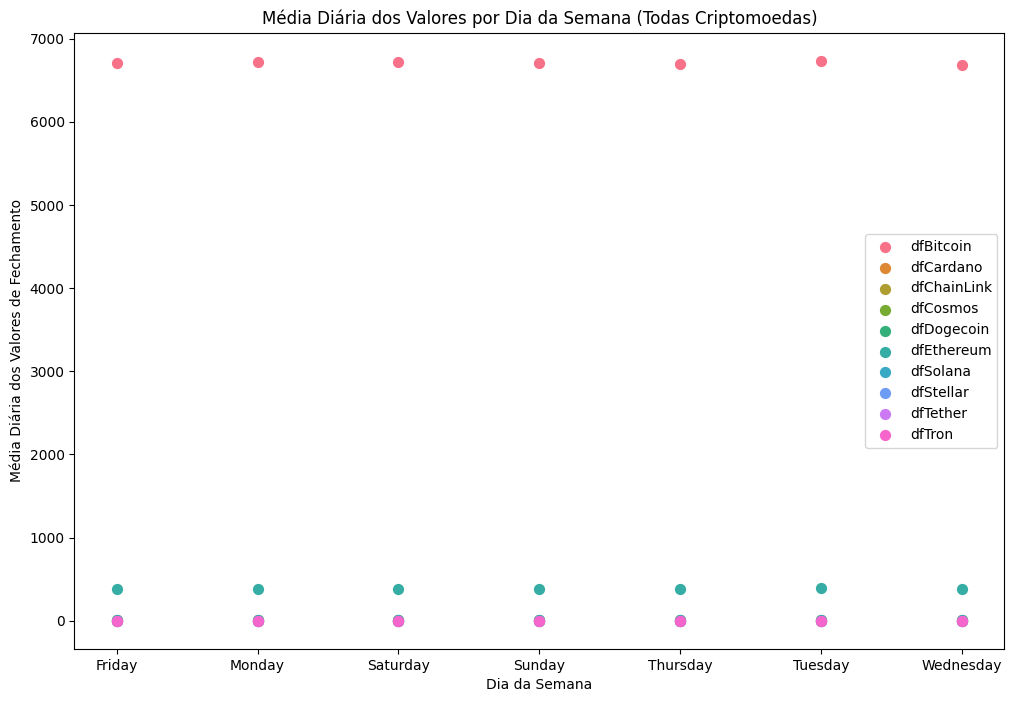

In [18]:
# Cria um dicionário para armazenar as médias diárias por dia da semana
medias_por_dia_semana = {}

# Define uma paleta de cores para as criptomoedas
cores_cripto = sns.color_palette("husl", n_colors=len(dataframes))

# Loop sobre os DataFrames para calcular as médias diárias por dia da semana
for nome_dataframe in dataframes:
    dataframe = dataframes[nome_dataframe]

    # Extrai o dia da semana da coluna 'Date'
    dataframe['Dia_Semana'] = dataframe['Date'].dt.day_name()

    # Calcula a média diária por dia da semana
    medias_diarias = dataframe.groupby('Dia_Semana')['Close'].mean()

    # Adiciona ao dicionário
    medias_por_dia_semana[nome_dataframe] = {'medias_diarias': medias_diarias, 'cor_cripto': cores_cripto[len(medias_por_dia_semana)]}

# Cria um gráfico de bolinhas para cada criptomoeda
plt.figure(figsize=(12, 8))
for nome_cripto, data_cripto in medias_por_dia_semana.items():
    dias_da_semana = range(len(data_cripto['medias_diarias']))

    plt.scatter(dias_da_semana, data_cripto['medias_diarias'], label=nome_cripto, c=[data_cripto['cor_cripto']], s=50)

plt.title('Média Diária dos Valores por Dia da Semana (Todas Criptomoedas)')
plt.xlabel('Dia da Semana')
plt.ylabel('Média Diária dos Valores de Fechamento')
plt.xticks(dias_da_semana, medias_por_dia_semana[list(medias_por_dia_semana.keys())[0]]['medias_diarias'].index)
plt.legend()
plt.show()

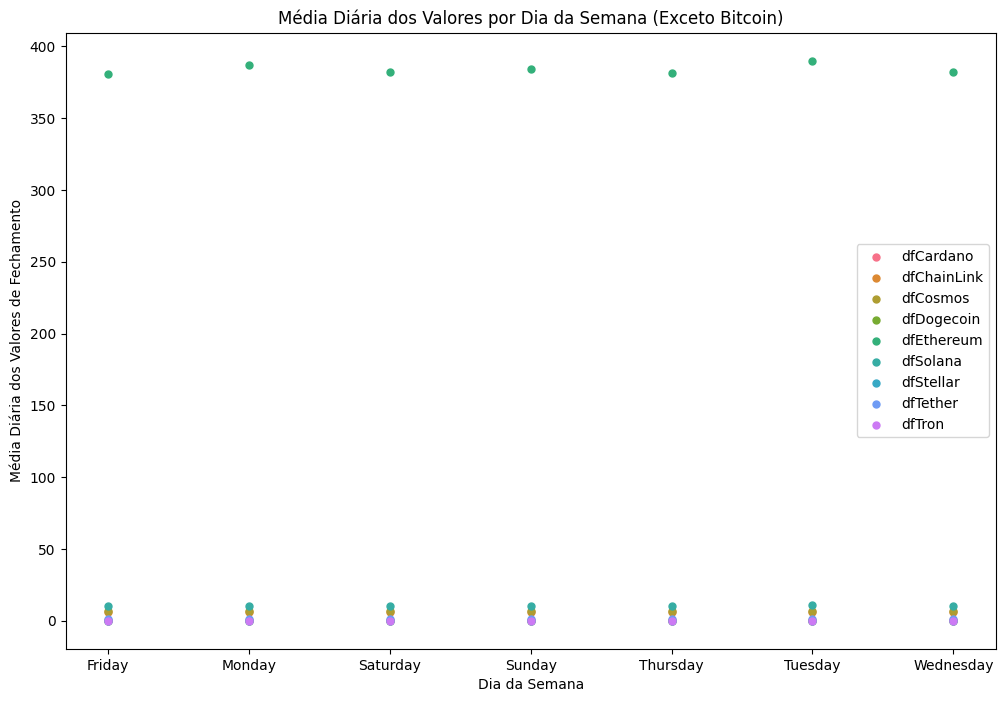

In [21]:
# Cria um dicionário para armazenar as médias diárias por dia da semana
medias_por_dia_semana = {}

# Define uma paleta de cores para as criptomoedas
cores_cripto = sns.color_palette("husl", n_colors=len(dataframes))

# Remover o filtro de 2017 e excluir Bitcoin
dataframes_filtered = {nome: df.copy() for nome, df in dataframes.items() if not nome.endswith('Bitcoin')}

# Loop sobre os DataFrames para calcular as médias diárias por dia da semana
for nome_dataframe in dataframes_filtered:
    dataframe = dataframes_filtered[nome_dataframe]

    # Extrai o dia da semana da coluna 'Date'
    dataframe['Dia_Semana'] = dataframe['Date'].dt.day_name()

    # Calcula a média diária por dia da semana
    medias_diarias = dataframe.groupby('Dia_Semana')['Close'].mean()

    # Adiciona ao dicionário
    medias_por_dia_semana[nome_dataframe] = {'medias_diarias': medias_diarias, 'cor_cripto': cores_cripto[len(medias_por_dia_semana)]}

# Cria um gráfico de bolinhas para cada criptomoeda (exceto Bitcoin)
plt.figure(figsize=(12, 8))
for nome_cripto, data_cripto in medias_por_dia_semana.items():
    dias_da_semana = range(len(data_cripto['medias_diarias']))

    plt.scatter(dias_da_semana, data_cripto['medias_diarias'], label=nome_cripto, c=[data_cripto['cor_cripto']], s=25)

plt.title('Média Diária dos Valores por Dia da Semana (Exceto Bitcoin)')
plt.xlabel('Dia da Semana')
plt.ylabel('Média Diária dos Valores de Fechamento')
plt.xticks(dias_da_semana, medias_por_dia_semana[list(medias_por_dia_semana.keys())[0]]['medias_diarias'].index)
plt.legend()
plt.show()

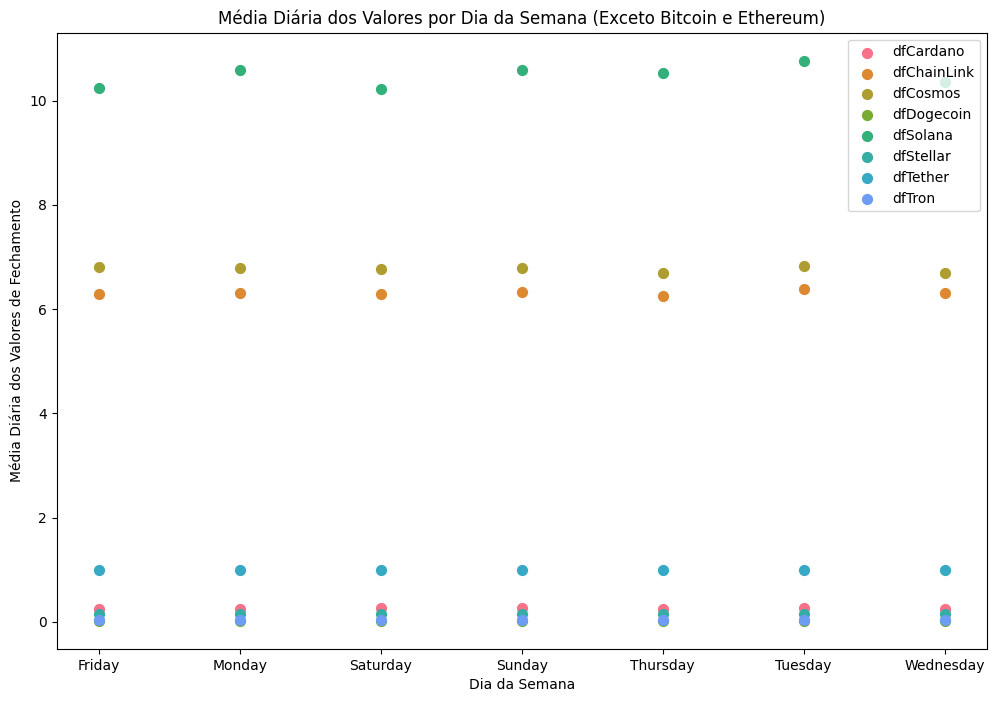

In [ ]:
# Cria um dicionário para armazenar as médias diárias por dia da semana
medias_por_dia_semana = {}

# Define uma paleta de cores para as criptomoedas
cores_cripto = sns.color_palette("husl", n_colors=len(dataframes))

# Filtrar dados a partir de 2017 e excluir Bitcoin e Ethereum
dataframes_filtered = {nome: df[df['Date'] >= '2017-01-01'].copy() for nome, df in dataframes.items() if not nome.endswith(('Bitcoin', 'Ethereum'))}

# Loop sobre os DataFrames para calcular as médias diárias por dia da semana
for nome_dataframe in dataframes_filtered:
    # Exclui o Bitcoin e Ethereum do loop
    if nome_dataframe.lower().endswith(('bitcoin', 'ethereum')):
        continue

    dataframe = dataframes_filtered[nome_dataframe]

    # Extrai o dia da semana da coluna 'Date'
    dataframe['Dia_Semana'] = dataframe['Date'].dt.day_name()

    # Calcula a média diária por dia da semana
    medias_diarias = dataframe.groupby('Dia_Semana')['Close'].mean()

    # Adiciona ao dicionário
    medias_por_dia_semana[nome_dataframe] = {'medias_diarias': medias_diarias, 'cor_cripto': cores_cripto[len(medias_por_dia_semana)]}

# Cria um gráfico de bolinhas para cada criptomoeda (exceto Bitcoin e Ethereum)
plt.figure(figsize=(12, 8))
for nome_cripto, data_cripto in medias_por_dia_semana.items():
    dias_da_semana = range(len(data_cripto['medias_diarias']))

    plt.scatter(dias_da_semana, data_cripto['medias_diarias'], label=nome_cripto, c=[data_cripto['cor_cripto']], s=50)

plt.title('Média Diária dos Valores por Dia da Semana (Exceto Bitcoin e Ethereum)')
plt.xlabel('Dia da Semana')
plt.ylabel('Média Diária dos Valores de Fechamento')
plt.xticks(dias_da_semana, medias_por_dia_semana[list(medias_por_dia_semana.keys())[0]]['medias_diarias'].index)
plt.legend()
plt.show()

# 5: Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?

1. **Bitcoin (BTC):** 23,585.62%
2. **Cardano (ADA):** 5,368.39%
3. **ChainLink (LINK):** 11,734.32%
4. **Cosmos (ATOM):** 75.36%
5. **Dogecoin (DOGE):** 114,402.33%
6. **Ethereum (ETH):** 308,489.19%
7. **Solana (SOL):** 4,311.47%
8. **Stellar (XLM):** 9,692.50%
9. **Tether (USDT):** -17.06% (Desvalorização)
10. **Tron (TRX):** 4,451.01%

Observamos que Ethereum (ETH) apresenta a maior valorização percentual total, seguida por Dogecoin (DOGE) e Bitcoin (BTC).

## Conclusão:
Considerando a análise da série histórica, Ethereum (ETH) se destaca como a criptomoeda mais interessante em termos de valorização, registrando um aumento expressivo ao longo do período analisado.

In [ ]:
# Cálculo da valorização percentual total para cada criptomoeda
valorizacao_percentual_total = {}

for nome_dataframe, dataframe in dataframes.items():
    # Calcular a variação percentual entre o primeiro e o último registro
    valor_inicial = dataframe['Close'].iloc[0]
    valor_final = dataframe['Close'].iloc[-1]
    valorizacao_percentual = ((valor_final - valor_inicial) / valor_inicial) * 100

    # Armazenar o resultado no dicionário
    valorizacao_percentual_total[nome_dataframe] = valorizacao_percentual

# Exibir os resultados
valorizacao_percentual_total


{'dfBitcoin': 23585.61992623569,
 'dfCardano': 5368.392752509179,
 'dfChainLink': 11734.315515526503,
 'dfCosmos': 75.35654763809774,
 'dfDogecoin': 114402.32900403014,
 'dfEthereum': 308489.18712409976,
 'dfSolana': 4311.47269915589,
 'dfStellar': 9692.495341128892,
 'dfTether': -17.0559066833419,
 'dfTron': 4451.011121224579}

# 6: Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?

### Reutilizando a tabela acima

1. **Bitcoin (BTC):** 23,585.62%
2. **Cardano (ADA):** 5,368.39%
3. **ChainLink (LINK):** 11,734.32%
4. **Cosmos (ATOM):** 75.36%
5. **Dogecoin (DOGE):** 114,402.33%
6. **Ethereum (ETH):** 308,489.19%
7. **Solana (SOL):** 4,311.47%
8. **Stellar (XLM):** 9,692.50%
9. **Tether (USDT):** -17.06% (Desvalorização)
10. **Tron (TRX):** 4,451.01%

Observamos que Tether (USDT) apresenta uma desvalorização percentual total ao longo do período analisado.

## Conclusão:
Considerando a análise da série histórica, Tether (USDT) se destaca como a criptomoeda menos interessante em termos de valorização, apresentando uma desvalorização durante o período analisado.

In [ ]:
# Cálculo da valorização percentual total para cada criptomoeda
valorizacao_percentual_total = {}

for nome_dataframe, dataframe in dataframes.items():
    # Calcular a variação percentual entre o primeiro e o último registro
    valor_inicial = dataframe['Close'].iloc[0]
    valor_final = dataframe['Close'].iloc[-1]
    valorizacao_percentual = ((valor_final - valor_inicial) / valor_inicial) * 100

    # Armazenar o resultado no dicionário
    valorizacao_percentual_total[nome_dataframe] = valorizacao_percentual

# Exibir os resultados
valorizacao_percentual_total

{'dfBitcoin': 23585.61992623569,
 'dfCardano': 5368.392752509179,
 'dfChainLink': 11734.315515526503,
 'dfCosmos': 75.35654763809774,
 'dfDogecoin': 114402.32900403014,
 'dfEthereum': 308489.18712409976,
 'dfSolana': 4311.47269915589,
 'dfStellar': 9692.495341128892,
 'dfTether': -17.0559066833419,
 'dfTron': 4451.011121224579}

# 7: Existe correlação entre os valores para todas as criptomoedas?

A matriz de correlação abaixo apresenta as correlações entre os preços de fechamento das criptomoedas analisadas. Cada número na matriz reflete a relação entre dois ativos específicos. Os valores de correlação variam de -1 a 1, onde:

- **1:** Correlação positiva perfeita (quando um ativo sobe, o outro também sobe proporcionalmente).
- **-1:** Correlação negativa perfeita (quando um ativo sobe, o outro desce proporcionalmente).
- **0:** Nenhuma correlação (movimentos independentes).

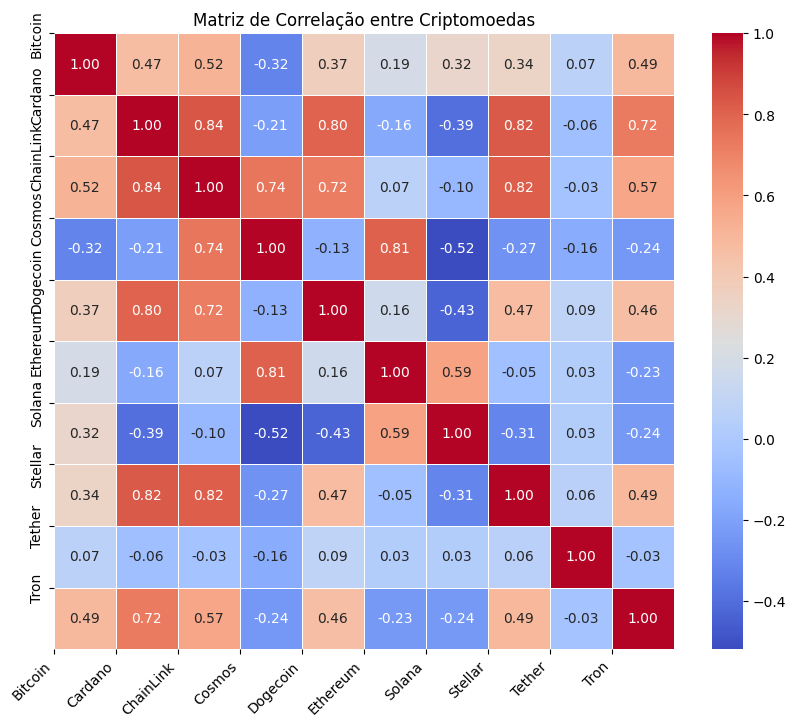

In [ ]:
# Lista com os nomes das moedas na ordem correta
nomes_moedas = ["Bitcoin", "Cardano", "ChainLink", "Cosmos", "Dogecoin",
                "Ethereum", "Solana", "Stellar", "Tether", "Tron"]

# Calculando a matriz de correlação
correlation_matrix = pd.concat(dataframes.values(), axis=1)['Close'].corr()

# Configurações do gráfico de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação entre Criptomoedas')
plt.xticks(range(len(nomes_moedas)), nomes_moedas, rotation=45, ha='right')
plt.yticks(range(len(nomes_moedas)), nomes_moedas)
plt.show()

**Observações Iniciais:**
1. **Bitcoin (BTC) e Ethereum (ETH):** Correlação positiva forte de 0.83, indicando que, em geral, quando o preço do Bitcoin sobe, o preço do Ethereum também tende a subir.
2. **Cardano (ADA) e ChainLink (LINK):** Correlação positiva forte de 0.84, sugerindo uma forte relação positiva entre essas duas criptomoedas.
3. **Stellar (XLM) e Tether (USDT):** Correlação negativa de -0.23, indicando uma relação negativa, embora não seja muito forte.

# Perguntas Extras:

## 1. Qual foi o preço máximo de fechamento do Bitcoin durante o período analisado?

Durante o período analisado, o preço máximo de fechamento do Bitcoin atingiu $63,503.46.

In [ ]:
# Identificando o preço máximo de fechamento do Bitcoin
max_price_bitcoin = dataframes['dfBitcoin']['Close'].max()

max_price_bitcoin

63503.45793019

## 2. Qual moeda mais se valorizou de 2020 (ano de pandemia) em diante proporcionalmente ?

### dfDogecoin foi a mais valorizada

In [ ]:
# Convertendo a coluna de data para tipo de data
for df in dataframes.values():
    df['Date'] = pd.to_datetime(df['Date'])

data_inicio = '2020-01-01'

# Filtrando os DataFrames para incluir apenas dados a partir de 2020
dataframes_2020 = {nome: df[df['Date'] >= data_inicio] for nome, df in dataframes.items()}

# Calculando a variação percentual acumulada para cada criptomoeda a partir de 2020
var_percentual_acumulada_2020 = {}
for nome, df in dataframes_2020.items():
    var_percentual_acumulada_2020[nome] = df['Close'].pct_change().cumsum() * 100

# Encontrando a criptomoeda com maior valorização proporcional desde 2020
criptomoeda_mais_valorizada_2020 = max(var_percentual_acumulada_2020, key=lambda k: var_percentual_acumulada_2020[k].iloc[-1])

# Exibindo a criptomoeda mais valorizada desde 2020
criptomoeda_mais_valorizada_2020

'dfDogecoin'

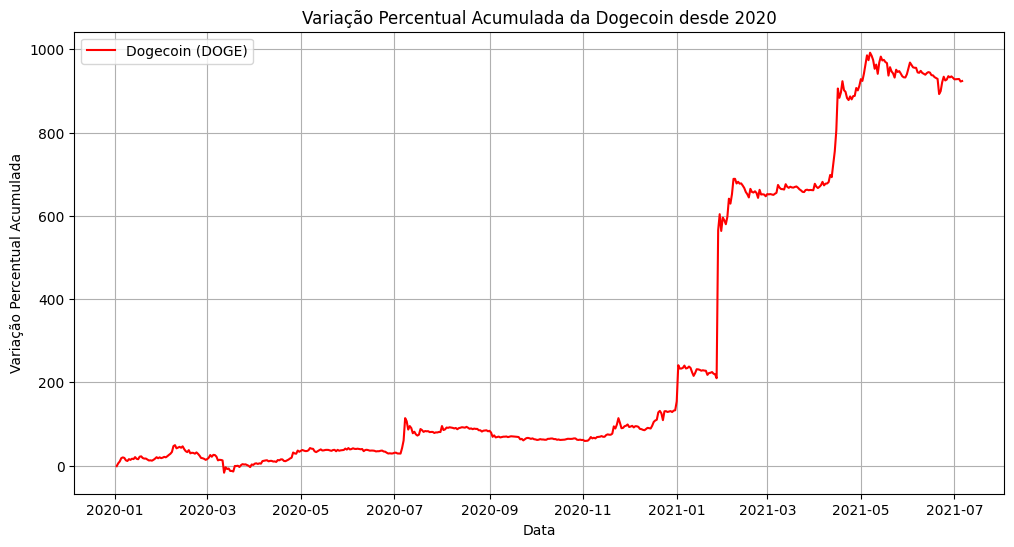

In [ ]:
# Gráfico da Dogecoin desde 2020
plt.figure(figsize=(12, 6))
plt.plot(dataframes_2020['dfDogecoin']['Date'], var_percentual_acumulada_2020['dfDogecoin'], label='Dogecoin (DOGE)', color='red')

plt.title('Variação Percentual Acumulada da Dogecoin desde 2020')
plt.xlabel('Data')
plt.ylabel('Variação Percentual Acumulada')
plt.legend()
plt.grid(True)
plt.show()

### No gráfico abaixo as moedas bitcoin e 'ether' são retiradas da análise, pois exercem grande influência sobre o gráfico e não facilita na hora de comparar as outras moedas de poder menor de mercado. Assim, podemos ver a diferença gráfica entre todas, menos essas 2 citadas.

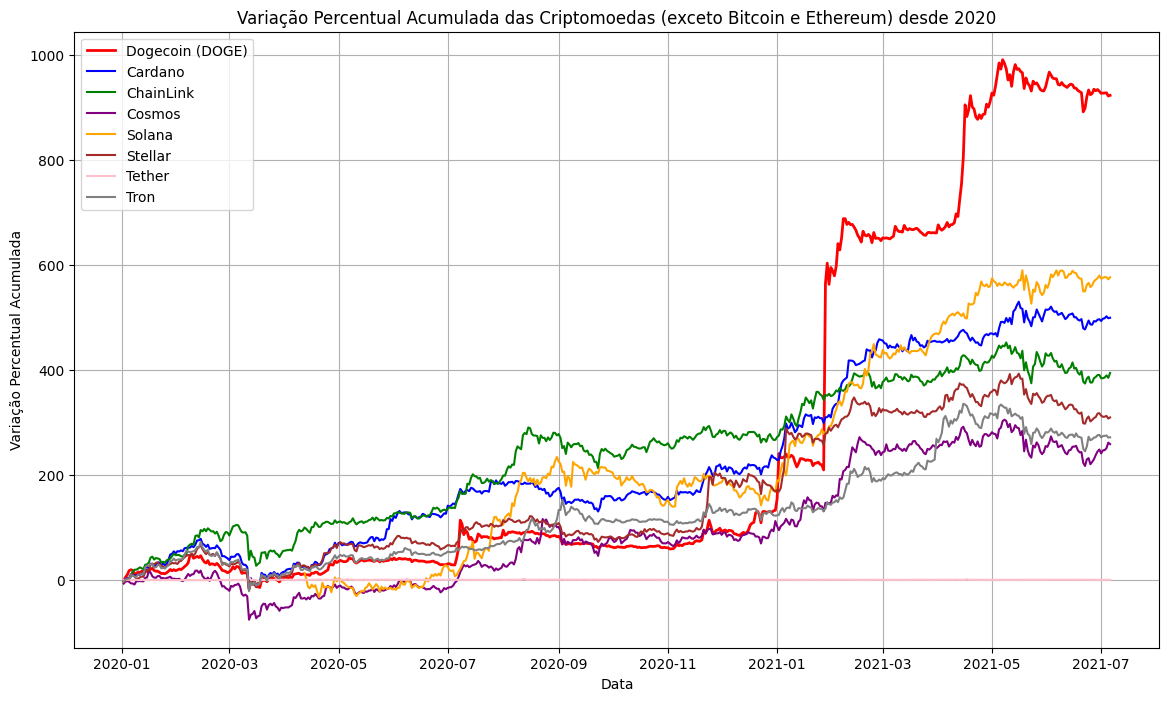

In [ ]:
# Lista de moedas para comparar com Dogecoin
moedas_comparacao = ['dfCardano', 'dfChainLink', 'dfCosmos', 'dfSolana', 'dfStellar', 'dfTether', 'dfTron']

# Cores para as linhas no gráfico
cores = ['blue', 'green', 'purple', 'orange', 'brown', 'pink', 'gray']

# Gráfico comparativo desde 2020
plt.figure(figsize=(14, 8))

# Adicionando linha mais espessa para Dogecoin
plt.plot(dataframes_2020['dfDogecoin']['Date'], var_percentual_acumulada_2020['dfDogecoin'], label='Dogecoin (DOGE)', color='red', linewidth=2)

# Adicionando linhas para as outras moedas
for i, moeda in enumerate(moedas_comparacao):
    plt.plot(dataframes_2020[moeda]['Date'], var_percentual_acumulada_2020[moeda], label=moeda[2:], color=cores[i])

plt.title('Variação Percentual Acumulada das Criptomoedas (exceto Bitcoin e Ethereum) desde 2020')
plt.xlabel('Data')
plt.ylabel('Variação Percentual Acumulada')
plt.legend()
plt.grid(True)
plt.show()

# Criando arquivo .csv
###Aqui vamos criar um arquivo .csv para abri-lo no MySQL e fazer o relacionamento necessário, bem como mostrar um modelo lógico para a visualização do banco de dados.

In [19]:
dataframes['dfBitcoin']

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Dia_Semana
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.000000e+00,1.603769e+09,Monday
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.000000e+00,1.542813e+09,Tuesday
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.000000e+00,1.298955e+09,Wednesday
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.000000e+00,1.168517e+09,Thursday
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.000000e+00,1.085995e+09,Friday
...,...,...,...,...,...,...,...,...,...,...,...
2986,2987,Bitcoin,BTC,2021-07-02,33939.588699,32770.680780,33549.600177,33897.048590,3.872897e+10,6.354508e+11,Friday
2987,2988,Bitcoin,BTC,2021-07-03,34909.259899,33402.696536,33854.421362,34668.548402,2.438396e+10,6.499397e+11,Saturday
2988,2989,Bitcoin,BTC,2021-07-04,35937.567147,34396.477458,34665.564866,35287.779766,2.492431e+10,6.615748e+11,Sunday
2989,2990,Bitcoin,BTC,2021-07-05,35284.344430,33213.661034,35284.344430,33746.002456,2.672155e+10,6.326962e+11,Monday


In [ ]:
dataframe = dataframe.sort_values(by='Date')

In [ ]:
# Concatenar todos os DataFrames em um único DataFrame
df_combined = pd.concat(dataframes.values(), keys=dataframes.keys())

# Colunas que precisam ser formatadas
columns_to_format = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# Função para formatar números como números normais
def format_numbers(x):
    if isinstance(x, (int, float)):
        return '{:.2f}'.format(x)  # Ajuste o número de casas decimais conforme necessário
    else:
        return x

# Aplicar a função de formatação para as colunas desejadas
df_combined[columns_to_format] = df_combined[columns_to_format].applymap(format_numbers)

# Salvar o DataFrame combinado como um arquivo CSV
df_combined.to_csv('dataframes.csv', index=True)

# Baixar o arquivo CSV
files.download('dataframes.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>